In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

In [180]:
failures_2010 = pd.read_csv('Failure_modelling/Failure_Data/failures_2010.csv', delimiter=';')
failures_2011 = pd.read_csv('Failure_modelling/Failure_Data/failures_2011.csv', delimiter=';')
failures_2012 = pd.read_csv('Failure_modelling/Failure_Data/failures_2012.csv', delimiter=';')
failures_2013 = pd.read_csv('Failure_modelling/Failure_Data/failures_2013.csv', delimiter=';')
failures_2014 = pd.read_csv('Failure_modelling/Failure_Data/failures_2014.csv', delimiter=';')
failures_2015 = pd.read_csv('Failure_modelling/Failure_Data/failures_2015.csv', delimiter=';')
failures_2016 = pd.read_csv('Failure_modelling/Failure_Data/failures_2016.csv', delimiter=';')
failures_2017 = pd.read_csv('Failure_modelling/Failure_Data/failures_2017.csv', delimiter=';')
failures_2018 = pd.read_csv('Failure_modelling/Failure_Data/failures_2018.csv', delimiter=';')
failures_2019 = pd.read_csv('Failure_modelling/Failure_Data/failures_2019.csv', delimiter=';')
failures = pd.concat([failures_2010, failures_2011, failures_2012, failures_2013, failures_2014, failures_2015, failures_2016, failures_2017, failures_2018, failures_2019], axis=0)
failures = failures.reset_index()
failures['age_at_failure'] = np.nan
display(failures)

,index,Unnamed: 0,relatie_code,storing_idnummer,storing_melddatum,storing_medium,storing_materiaal,storing_type,storing_type_hulpstuk,storing_aanlegjaar,...,storing_drempelafstand,storing_verschijningsvorm,storing_bescherminginwendig,storing_soortoorzaak,storing_oorzaak1spontanestoring,storing_oorzaak2spontanestoring,storing_oorzaakinternebedrijfsvoering,storing_storendobject,Unnamed: 29,age_at_failure
0,0,418,C,-,2010-03-05,-,MAT_GG,TYP_LMOF,-,1975,...,-,-,BI_GG_GEEN,ORZ_SPONTAAN,NaN,NaN,NaN,BUIS,NaN,NaN
1,1,978,B,-,2010-06-03,-,MAT_ST,-,-,1954,...,-,BUIS_AND,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,-,NaN,NaN
2,2,359,A,-,2010-02-24,-,MAT_PVC,-,-,1990,...,-,BUIS_SCHERF,-,ORZ_SPONTAAN,NaN,NaN,NaN,BUIS,NaN,NaN
3,3,2049,B,-,2010-09-29,-,MAT_ST,-,-,-1,...,-,BUIS_PUNTLEK,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN,NaN
4,4,444,A,-,2010-03-10,-,MAT_AC,TYP_NTRV_STEEK,-,1960,...,-,VERB_SCHUIF,-,ORZ_SPONTAAN,ORZ_SPON1_UITWBEL,NaN,NaN,VERB,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,128,165,B,-1,2019-01-27,DW,MAT_GG,NaN,-,1934,...,-,BUIS_RONDBR,BI_GG_GEEN,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN,NaN
2306,129,2228,B,50478342,2019-12-09,DW,MAT_AC,NaN,-,1976,...,-,BUIS_LENGTES,-,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN,NaN
2307,130,1611,B,50471369,2019-09-09,DW,MAT_ST,NaN,-,1973,...,-,BUIS_PUNTLEK,BI_ST_ONB,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN,NaN
2308,131,2231,B,50478354,2019-12-09,DW,MAT_AC,NaN,-,1973,...,-,BUIS_SCHERF,-,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN,NaN


In [181]:
failures_fix_mat = failures[failures['storing_materiaal'] != '-']
failures_fix_year = failures_fix_mat[failures_fix_mat['storing_aanlegjaar'] != -1]
failures_fix_cause = failures_fix_year[failures_fix_year['storing_soortoorzaak'] == 'ORZ_SPONTAAN']

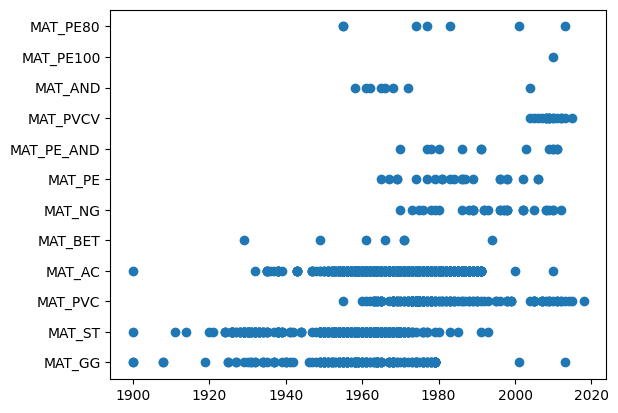

In [182]:
plt.scatter(x=failures_fix_cause['storing_aanlegjaar'], y=failures_fix_cause['storing_materiaal'])

In [183]:
failures_fix_cause.loc[:,'storing_melddatum'] = pd.to_datetime(failures_fix_cause.loc[:,'storing_melddatum'], format='%Y-%m-%d')
failures_fix_cause.loc[:,'storing_aanlegjaar'] = pd.to_datetime(failures_fix_cause.loc[:,'storing_aanlegjaar'], format='%Y')
failures_fix_cause.loc[:,'age_at_failure'] = (pd.to_datetime(failures_fix_cause.loc[:,'storing_melddatum'], format='%Y-%m-%d').values - pd.to_datetime(failures_fix_cause.loc[:,'storing_aanlegjaar'], format='%Y').values) /  pd.Timedelta(days=365.25)


In [184]:
pipes = pd.read_csv(
    "Failure_modelling/Failure_Data/2024_processed_leidingen_glisexport.csv",
    delimiter=";",
    index_col=0,
)
display(pipes)

,Batch jaartal,Aanlegjaar,ID nummer,Lengte,Diameter,Materiaalcode,Bedrijf,Bescherming uitwendig,Bescherming inwendig,Relining,Kathodische bescherming
2166783,2018,1974,233514287,368.595185,200,MAT_AC,B,BU_AC_GEEN,-,RELIN_NEE,-
2196114,2019,1968,177852534,117.991714,100,MAT_GG,B,-,-,RELIN_NEE,KB_NEE
2055089,2018,2001,177622476,39.556610,100,MAT_NG,B,BU_NG_PE,BI_NG_CL,RELIN_NEE,KB_NEE
1668377,2016,2001,-1,6436.656000,504,MAT_NG,C,-,-,-,-
2115381,2018,1992,178402238,31.352994,100,MAT_NG,B,BU_NG_PE,BI_NG_CL,RELIN_NEE,KB_NEE
...,...,...,...,...,...,...,...,...,...,...,...
2073596,2018,1989,177860883,36.457173,110,MAT_PVC,B,-,-,RELIN_NEE,-
2126919,2018,1989,178554099,7.511757,200,MAT_AC,B,BU_AC_GEEN,-,RELIN_NEE,-
2113317,2018,1992,178370569,104.638249,100,MAT_NG,B,BU_NG_PE,BI_NG_CL,RELIN_NEE,KB_NEE
2115420,2018,1966,178402661,129.786245,100,MAT_AC,B,BU_AC_GEEN,-,RELIN_NEE,-


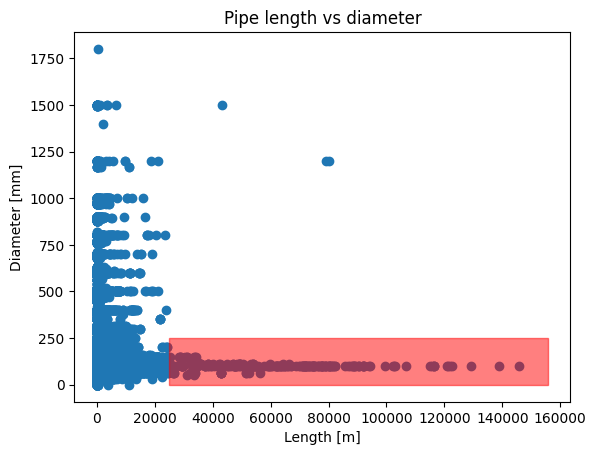

In [185]:
plt.scatter(x=pipes['Lengte'], y=pipes['Diameter'])
plt.xlabel('Length [m]')
plt.ylabel('Diameter [mm]')

x_vertices = [25000, pipes['Lengte'].max()+10000, pipes['Lengte'].max()+10000, 25000]
y_vertices = [250, 250, pipes['Diameter'].min(), pipes['Diameter'].min()]

plt.fill(x_vertices, y_vertices, color='red', alpha=0.5)
plt.title('Pipe length vs diameter')
plt.show()


In [186]:
pipes_fix_dia_len = pipes[~((pipes['Lengte'] > 25000) & (pipes['Diameter'] < 250))].copy()

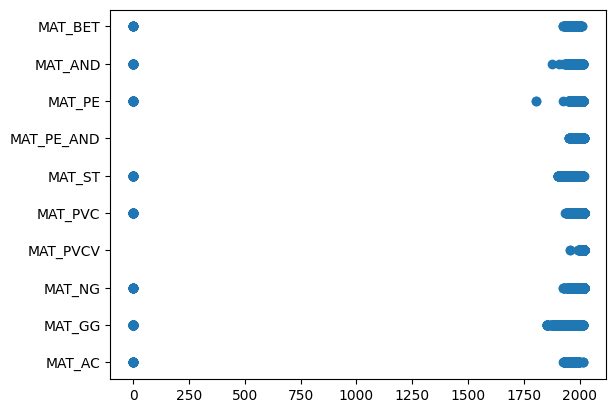

In [187]:
plt.scatter(x=pipes_fix_dia_len['Aanlegjaar'], y=pipes_fix_dia_len['Materiaalcode'])

In [188]:
pipes_fix_dia_len.loc[((pipes_fix_dia_len['Materiaalcode'] == 'MAT_PE') & (pipes_fix_dia_len['Aanlegjaar'] == 1802)), 'Aanlegjaar'] = -1

In [189]:
failures_fix_cause.to_csv('Failure_modelling/Failure_Data/failure_data.csv')
pipes_fix_dia_len.to_csv('Failure_modelling/Failure_Data/pipe_data.csv')